In [299]:
# Import package dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Ridge

# Load data

In [200]:
dt = pd.read_csv('./data/train.csv')
du= pd.read_csv('./data/unique_m.csv')

# Exploration

In [201]:
print(dt.shape)
dt.head()

(21263, 82)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [202]:
p = dt.describe()
p

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


# Check for missing data

In [203]:
for i in dt.columns:
    if p.loc["count", i] != dt.shape[0]:
        print (i)

# Delete the response

In [204]:
del du['critical_temp']
print(du.shape)
du.head()

(21263, 87)


,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4


# Using the material columns because it is strem, and is variable for each row, so the decision was no to use it

In [205]:
f= du.iloc[:, 0:85]

# Check for missing data in the second datafile

In [206]:
d = f.describe()
d

,H,He,Li,Be,B,C,N,O,F,Ne,...,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,0.022512,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,0.282265,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,10.000000,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0


In [207]:
for i in d.columns:
    if d.loc["count", i] != du.shape[0]:
        print (i)

# Merged the 2 data file by the row index

In [208]:
# Merge two Dataframes on index of both the dataframes
mergedDf = dt.merge(du, left_index=True, right_index=True)

# Check the merged data

In [209]:
print(mergedDf.shape)
mergedDf.head()

(21263, 169)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4


In [210]:
mergedDf.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0


In [211]:
mergedDf.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
Bi                       float64
Po                         int64
At                         int64
Rn                         int64
material                  object
Length: 169, dtype: object

# Explorate each column with pandas profiling

In [70]:
profile = ProfileReport(mergedDf, minimal=True)
profile.to_file(output_file="output.html")

# Response

In [212]:
response= mergedDf["critical_temp"]
del mergedDf['critical_temp']
response.shape

(21263,)

# Normalization of the data

In [213]:
sc= mergedDf.iloc[:, 0:167]
x = sc.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalize_df = pd.DataFrame(x_scaled)
normalize_df["material"]= mergedDf["material"]
normalize_df

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,material
0,0.375,0.405879,0.253950,0.299720,0.164988,0.595724,0.542536,0.590973,0.154652,0.514443,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Ba0.2La1.8Cu1O4
1,0.500,0.424611,0.257187,0.332968,0.166341,0.730573,0.540166,0.590973,0.175894,0.466193,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.375,0.405879,0.254061,0.299720,0.165017,0.595724,0.498406,0.590973,0.173847,0.514443,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Ba0.1La1.9Cu1O4
3,0.375,0.405879,0.254005,0.299720,0.165002,0.595724,0.522056,0.590973,0.164249,0.514443,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Ba0.15La1.85Cu1O4
4,0.375,0.405879,0.253838,0.299720,0.164960,0.595724,0.576663,0.590973,0.135458,0.514443,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.375,0.495037,0.230416,0.379038,0.198893,0.593380,0.640444,0.706254,0.075415,0.651003,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Tm0.84Lu0.16Fe3Si5
21259,0.500,0.422322,0.210301,0.292115,0.149295,0.667047,0.802588,0.905812,0.035767,0.685338,...,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,Tl1Ba2Ca3Cu4O11
21260,0.125,0.458931,0.440299,0.462110,0.451665,0.348245,0.270757,0.064978,0.257995,0.066886,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Nb0.8Pd0.2
21261,0.125,0.458931,0.447638,0.462110,0.458605,0.348245,0.327281,0.064978,0.151346,0.066886,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Nb0.69Pd0.31


In [214]:
normalize_df.columns= mergedDf.columns
del normalize_df['material']
normalize_df["Critical_Temperature"]= response
normalize_df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,Critical_Temperature
0,0.375,0.405879,0.253950,0.299720,0.164988,0.595724,0.542536,0.590973,0.154652,0.514443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1,0.500,0.424611,0.257187,0.332968,0.166341,0.730573,0.540166,0.590973,0.175894,0.466193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
2,0.375,0.405879,0.254061,0.299720,0.165017,0.595724,0.498406,0.590973,0.173847,0.514443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
3,0.375,0.405879,0.254005,0.299720,0.165002,0.595724,0.522056,0.590973,0.164249,0.514443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,0.375,0.405879,0.253838,0.299720,0.164960,0.595724,0.576663,0.590973,0.135458,0.514443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0


# Split the data in train and test

In [215]:
# Create training and testing sets (cross-validation not needed)
train_set = normalize_df.sample(frac=0.7, random_state=100)
test_set = normalize_df[~normalize_df.isin(train_set)].dropna()
print(train_set.shape[0])
print(test_set.shape[0])

14884
6379


In [216]:
# Get the training and testing row indices for later use
train_index = train_set.index.values.astype(int)
test_index = test_set.index.values.astype(int)

In [217]:
# Converting the training and testing datasets back to matrix-formats
X_train = train_set.iloc[:, 0:167].values # returns the data; excluding the target
Y_train = train_set.iloc[:, -1].values # returns the target-only
X_test = test_set.iloc[:, 0:167].values # ""
Y_test = test_set.iloc[:, -1].values # ""

# Lasso regularization

# Using grid

In [315]:
l1_mod = linear_model.Lasso()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(l1_mod,parameters, cv=None)
grid.fit(X_train, Y_train)
print( "r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - Y_test) ** 2))

print(grid.score(X_train, Y_train))
#print(grid.coef_)
#print(grid.intercept_)
print(grid.best_params_)

r2 / variance :  0.5445279291907796
Residual sum of squares: 527.67
0.5452199318400981
{'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [316]:
l1_mod = linear_model.Lasso(copy_X= True, fit_intercept= True, normalize= False).fit(X_train, Y_train)
print(l1_mod.score(X_train, Y_train))
print(l1_mod.coef_)
print(l1_mod.intercept_)
print(l1_mod.get_params())

0.5452199318400981
[ 0.         -0.         -0.         -0.         -0.          0.
  3.59741713  3.02623774 -0.          0.          0.          0.
  0.         -0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
 -0.          0.          0.         20.71959225 -0.          0.
  0.         -0.         -0.         -0.         -0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.         -0.          0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.          0.
  0.          2.0126279   0.          0.         52.97651725 -0.
 -0.         -0.         -0.          0.          0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.
  0.  

# Interpret the weights

In [319]:
# iterate over the coefficients
weights = l1_mod.coef_.T # take transpose to make a column vector
variable_names = normalize_df.columns
for coef, name in zip(weights,variable_names):
    if coef > 0 or coef < 0 :
        print(name, 'has weight of', coef)
    


wtd_entropy_atomic_mass has weight of 3.5974171333233285
range_atomic_mass has weight of 3.0262377363961357
range_atomic_radius has weight of 20.719592248451143
range_ThermalConductivity has weight of 2.0126278978473717
wtd_std_ThermalConductivity has weight of 52.976517252039294


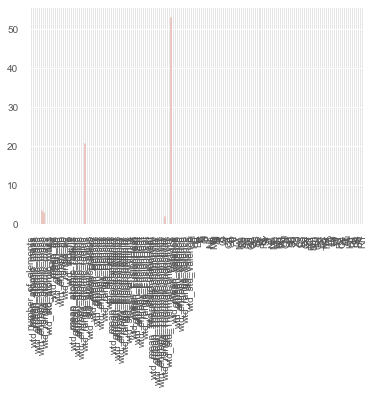

In [320]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(weights,index=normalize_df.columns[0:167])
weights.plot(kind='bar')
plt.show()

# Predict

In [321]:
Y_pred2 = l1_mod.predict(X_test)

orig_mae2 = mean_absolute_error(Y_test,Y_pred2)
orig_mse2 = mean_squared_error(Y_test,Y_pred2)
orig_rmse_val2 = rmse(Y_test,Y_pred2)
orig_r22 = r2_score(Y_test,Y_pred2)
print("MAE: %.3f"%orig_mae2)
print("MSE:  %.3f"%orig_mse2)
print("RMSE:  %.3f"%orig_rmse_val2)
print("R2:  %.3f"%orig_r22)

MAE: 17.945
MSE:  527.669
RMSE:  22.971
R2:  0.543


# Try with x train for comparison

In [322]:
Y_pred2_tr = l1_mod.predict(X_train)

orig_mae2_tr = mean_absolute_error(Y_train,Y_pred2_tr)
orig_mse2_tr = mean_squared_error(Y_train,Y_pred2_tr)
orig_rmse_val2_tr = rmse(Y_train,Y_pred2_tr)
orig_r22_tr = r2_score(Y_train,Y_pred2_tr)
print("MAE: %.3f"%orig_mae2_tr)
print("MSE:  %.3f"%orig_mse2_tr)
print("RMSE:  %.3f"%orig_rmse_val2_tr)
print("R2:  %.3f"%orig_r22_tr)

MAE: 18.184
MSE:  537.079
RMSE:  23.175
R2:  0.545


In [323]:
# Find the variable with the largest "normalized" coefficient value
print('The positive(max) coef-value is {}'.format(max(l1_mod.coef_))) # Positive Max
#print('The abs(max) coef-value is {}'.format(max(l1_mod.coef_, key=abs))) # ABS Max
max_var = max(l1_mod.coef_) # Positive Max
#max_var = max(reg.coef_, key=abs) # ABS Max
var_index = l1_mod.coef_.tolist().index(max_var)
print('The variable associated with this coef-value is {}'.format(normalize_df.columns[var_index]))

The positive(max) coef-value is 52.976517252039294
The variable associated with this coef-value is wtd_std_ThermalConductivity


In [324]:
res_frame1 = pd.DataFrame({'data':'lasso',
                   'imputation':'none',
                   'mae': orig_mae2, 
                   'mse': orig_mse2, 
                   'rmse':orig_rmse_val2, 
                   'R2':orig_r22}, index=[0])
res_frame1 

,data,imputation,mae,mse,rmse,R2
0,lasso,none,17.944527,527.669052,22.971048,0.543249


# Ridge regularization

# Using the grib

In [328]:
l2g_mod = linear_model.Ridge()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(l2g_mod,parameters, cv=None)
grid.fit(X_train, Y_train)
print( "r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - Y_test) ** 2))

print(grid.score(X_train, Y_train))
#print(grid.coef_)
#print(grid.intercept_)
print(grid.best_params_)

r2 / variance :  0.758325516815348
Residual sum of squares: 295.81
0.7634558649392922
{'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [329]:
l2_mod = Ridge(copy_X=  True, fit_intercept= False, normalize= True).fit(X_train, Y_train)
print(l2_mod.score(X_train, Y_train))
print(l2_mod.coef_)
print(l2_mod.intercept_)
print(l2_mod.get_params())

0.7634558649392922
[   7.91062458   47.30622909  -51.6400787    12.37665213  -11.22682074
  -40.74872745   30.34193512   35.97067085    7.66876943  -11.11699651
  -36.07645656   -3.66504517    9.08158471    3.62989504    9.17872922
   14.34454603   43.57476037   53.29884178    9.81800082  -46.05210316
  -13.0280795     0.72725255   57.18669227  -39.99991887   -8.78896665
  -14.67641978    8.7092709    26.84914844  -15.6769795   -57.47583125
   38.71674256  -44.60915615   33.38880863  -27.94486327   22.38779193
  -13.21555294  -15.48467836  -22.42720131    3.65544365   21.97358711
   -5.80224495   20.86170936   42.66349588    4.34648447  -72.46902875
    2.02809317  -29.60575596  -77.67010282  -17.86175085  108.71742169
  -33.63712224   20.1527846   -25.91923856    0.85731382   -2.49769216
  -19.28759048   32.85808139  -19.95411263   37.52016582    7.371185
   -8.84128999    4.60518112  118.96780595  -36.72623004  -63.50607945
   10.91886633   12.30267012  -30.55086554  -47.89457023   2

# Interprete the weight

In [330]:
# iterate over the coefficients
weights = l2_mod.coef_.T # take transpose to make a column vector
variable_names = normalize_df.columns
for coef, name in zip(weights,variable_names):
    if coef > 50 or coef < -50:
        print(name, 'has weight of', coef)

wtd_mean_atomic_mass has weight of -51.64007869868216
range_fie has weight of 53.29884177520931
wtd_mean_atomic_radius has weight of 57.18669226797604
std_atomic_radius has weight of -57.47583124785458
wtd_gmean_ElectronAffinity has weight of -72.46902874881374
range_ElectronAffinity has weight of -77.67010282482984
std_ElectronAffinity has weight of 108.71742169022825
wtd_mean_ThermalConductivity has weight of 118.96780594609412
wtd_gmean_ThermalConductivity has weight of -63.506079449203945
wtd_std_Valence has weight of -52.84175568633339
Si has weight of -110.20588826068939
Ag has weight of -57.76536796384514
Ba has weight of 153.7138292558915
Bi has weight of 90.59968149571621


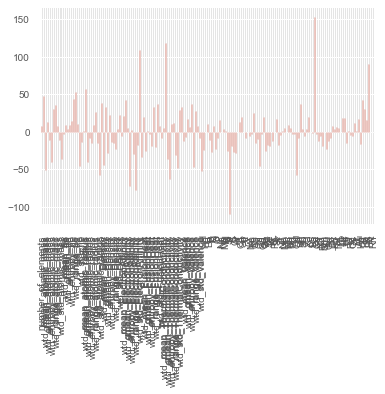

In [331]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(weights,index=normalize_df.columns[0:167])
weights.plot(kind='bar')
plt.show()

# Prediction

In [332]:
Y_pred3 = l2_mod.predict(X_test)

orig_mae3 = mean_absolute_error(Y_test,Y_pred3)
orig_mse3 = mean_squared_error(Y_test,Y_pred3)
orig_rmse_val3 = rmse(Y_test,Y_pred3)
orig_r23 = r2_score(Y_test,Y_pred3)
print("MAE: %.3f"%orig_mae3)
print("MSE:  %.3f"%orig_mse3)
print("RMSE:  %.3f"%orig_rmse_val3)
print("R2:  %.3f"%orig_r23)

MAE: 12.712
MSE:  295.806
RMSE:  17.199
R2:  0.744


# Try the train for comparison

In [333]:
Y_pred3_tr = l2_mod.predict(X_train)

orig_mae3_tr = mean_absolute_error(Y_train,Y_pred3_tr)
orig_mse3_tr = mean_squared_error(Y_train,Y_pred3_tr)
orig_rmse_val3_tr = rmse(Y_train,Y_pred3_tr)
orig_r23_tr = r2_score(Y_train,Y_pred3_tr)
print("MAE: %.3f"%orig_mae3_tr)
print("MSE:  %.3f"%orig_mse3_tr)
print("RMSE:  %.3f"%orig_rmse_val3_tr)
print("R2:  %.3f"%orig_r23_tr)

MAE: 12.513
MSE:  279.350
RMSE:  16.714
R2:  0.763


In [334]:
# Find the variable with the largest "normalized" coefficient value
print('The positive(max) coef-value is {}'.format(max(l2_mod.coef_))) # Positive Max
#print('The abs(max) coef-value is {}'.format(max(l2_mod.coef_, key=abs))) # ABS Max
max_var3 = max(l2_mod.coef_) # Positive Max
#max_var = max(reg.coef_, key=abs) # ABS Max
var_index3 = l2_mod.coef_.tolist().index(max_var3)
print('The variable associated with this coef-value is {}'.format(normalize_df.columns[var_index]))

The positive(max) coef-value is 153.7138292558915
The variable associated with this coef-value is wtd_std_ThermalConductivity


In [335]:
res_frame2 = pd.DataFrame({'data':'Ridge',
                   'imputation':'none',
                   'mae': orig_mae3, 
                   'mse': orig_mse3, 
                   'rmse':orig_rmse_val3, 
                   'R2':orig_r23}, index=[0])
res_frame = pd.concat([res_frame1, res_frame2])
res_frame

,data,imputation,mae,mse,rmse,R2
0,lasso,none,17.944527,527.669052,22.971048,0.543249
0,Ridge,none,12.711543,295.806355,17.199022,0.743950
